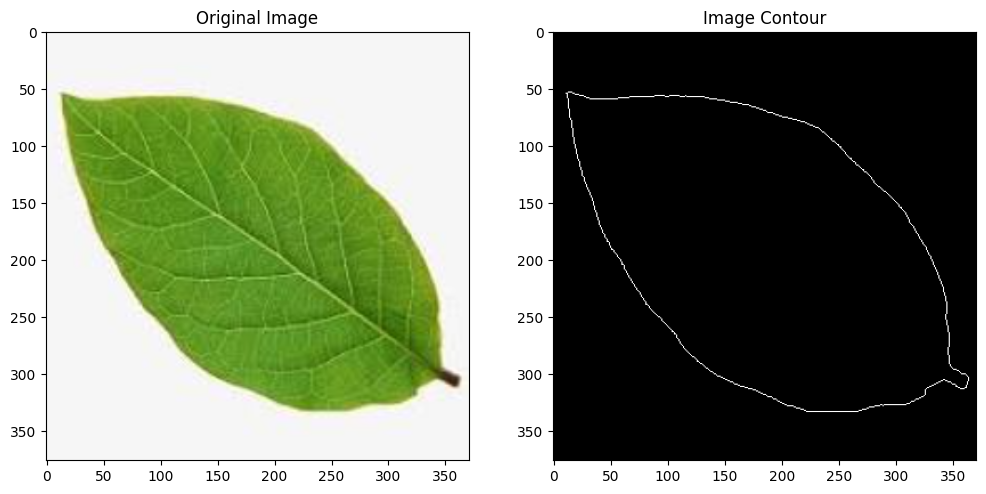

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the image
image = cv2.imread('image-b.png')

# Convert to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to get binary image
_, img = cv2.threshold(gray_img, 225, 255, cv2.THRESH_BINARY_INV)

# Initialize variables
B = []
starting_pixel = list(zip(*np.where(img == 255)))
B_x = starting_pixel[0][0]
B_y = starting_pixel[0][1]
B.append(starting_pixel[0])

b_x = starting_pixel[0][0]
b_y = starting_pixel[0][1] - 1

d_x = b_x - B_x
d_y = b_y - B_y

offsetTable = [(0, 0), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1)]
count = 1
contour = np.zeros(image.shape[:2], dtype=np.uint8)

while count == 1:
    id = 0
    for i in range(9):
        if d_x == offsetTable[i][0] and d_y == offsetTable[i][1]:
            id = i
            break
    while True:
        if id == 8:
            id = 0
        c_x = B_x + offsetTable[id + 1][0]
        c_y = B_y + offsetTable[id + 1][1]
        if img[c_x, c_y] != 0:
            B_x = c_x
            B_y = c_y
            temp = (B_x, B_y)
            if temp in B:
                count += 1
            B.append(temp)
            d_x = prev_x - B_x
            d_y = prev_y - B_y
            break
        prev_x = c_x
        prev_y = c_y
        id += 1

for pixel in B:
    contour[pixel[0], pixel[1]] = 255

# Plot the original image and the contour image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Image Contour')
plt.imshow(contour, cmap='gray')
plt.show()
